DataFrame Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Dimensi Data Iris Dataset: (150, 5)

Data dengan Status_Sepal:
   sepal_length  sepal_length_int status_sepal
0           5.1                 5       Ganjil
1           4.9                 4        Genap
2           4.7                 4        Genap
3           4.6                 4        Genap
4           5.0                 5       Ganjil

Jumlah iris dengan sepal length genap: 76
Jumlah iris dengan sepal length ganjil: 74


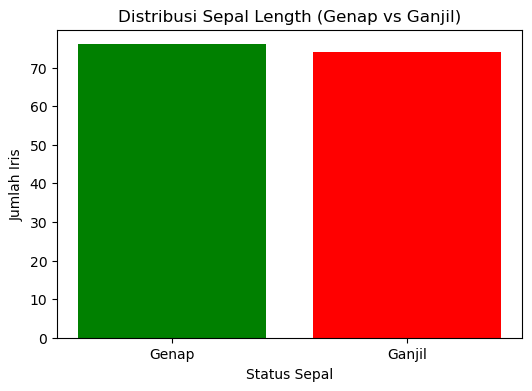

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset IrisDataset.csv dengan pemisah titik koma
iris_df = pd.read_csv('IrisDataset.csv', sep=';', engine='python')

# Cek apakah dataset terbagi menjadi beberapa kolom atau hanya satu kolom
if iris_df.shape[1] == 1:
    # Jika hanya satu kolom, pisahkan berdasarkan tanda ';'
    iris_df = iris_df[iris_df.columns[0]].str.split(";", expand=True)
    # Asumsikan baris pertama adalah header, set header tersebut dan hapus baris pertama
    iris_df.columns = iris_df.iloc[0]
    iris_df = iris_df[1:]
    
# Tampilkan beberapa baris pertama untuk verifikasi
print("DataFrame Iris Dataset:")
print(iris_df.head())
print("Dimensi Data Iris Dataset:", iris_df.shape)

# Bersihkan nama kolom dan ubah ke huruf kecil agar konsisten
iris_df.columns = iris_df.columns.str.strip().str.lower()

# Pastikan kolom 'sepal_length' ada dan konversikan ke tipe numerik
iris_df['sepal_length'] = pd.to_numeric(iris_df['sepal_length'], errors='coerce')

# Karena 'sepal_length' awalnya bertipe float, kita konversi ke integer untuk operasi modulus
iris_df['sepal_length_int'] = iris_df['sepal_length'].astype(int)

# Gunakan operator modulus untuk menentukan apakah nilai sepal_length_int genap atau ganjil
iris_df['status_sepal'] = iris_df['sepal_length_int'].apply(lambda x: 'Genap' if x % 2 == 0 else 'Ganjil')

# Tampilkan kolom asli, hasil konversi, dan status genap/ganjil untuk verifikasi
print("\nData dengan Status_Sepal:")
print(iris_df[['sepal_length', 'sepal_length_int', 'status_sepal']].head())

# Analisis tambahan: hitung jumlah iris dengan sepal_length genap dan ganjil
jumlah_genap = iris_df[iris_df['status_sepal'] == 'Genap'].shape[0]
jumlah_ganjil = iris_df[iris_df['status_sepal'] == 'Ganjil'].shape[0]
print(f"\nJumlah iris dengan sepal length genap: {jumlah_genap}")
print(f"Jumlah iris dengan sepal length ganjil: {jumlah_ganjil}")

# Visualisasi sederhana: Distribusi status sepal length
status_counts = iris_df['status_sepal'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.title('Distribusi Sepal Length (Genap vs Ganjil)')
plt.xlabel('Status Sepal')
plt.ylabel('Jumlah Iris')
plt.show()
